In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs , make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
x1,y1 = make_circles(n_samples=50)

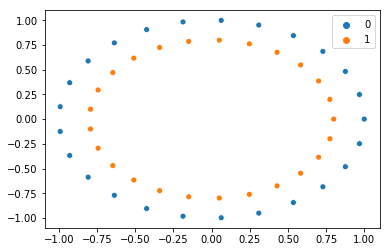

In [3]:
sns.scatterplot(x1[:,0],x1[:,1],hue=y1)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
model_log =LogisticRegression()
model_tree = DecisionTreeClassifier() # if most of the data is in catagoricaal then we procide with DT
model_knn = KNeighborsClassifier(n_neighbors=5) # images , similarity
model_svm_linear = SVC(kernel='linear',C=5) # nothing but similar to logistic regration (SVM is a modification of logistic reg)
model_svm_kernal = SVC(kernel='rbf', C=4) # radial bias function (kind of a gause function)
# anything whish is there in form vectots then we aply SVM (note: vector = numarical values)
# SVM generally for text and images
# CNN is also SVM( the idea of CNN came from SVM)

In [38]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2)


# Training Logistic Regression
- default probablity = 0.5

In [39]:
model_log.fit(x_train,y_train)
model_tree.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm_linear.fit(x_train,y_train)
model_svm_kernal.fit(x_train,y_train)

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred_log = model_log.predict(x_test)
y_pred_tree = model_tree.predict(x_test)
y_pred_knn = model_knn.predict(x_test)
y_pred_svmlin = model_svm_linear.predict(x_test)
y_pred_svmker = model_svm_kernal.predict(x_test)


In [9]:
from pandas_ml import ConfusionMatrix

In [10]:
cm_log = ConfusionMatrix(y_test,y_pred_log)
cm_tree = ConfusionMatrix(y_test,y_pred_tree)
cm_knn = ConfusionMatrix(y_test,y_pred_knn)
cm_svmlin = ConfusionMatrix(y_test,y_pred_svmlin)
cm_svmker = ConfusionMatrix(y_test,y_pred_svmker)

In [11]:
cm_log

Predicted  False  True  __all__
Actual                         
False          2     3        5
True           3     2        5
__all__        5     5       10

In [12]:
cm_tree

Predicted  False  True  __all__
Actual                         
False          4     1        5
True           1     4        5
__all__        5     5       10

In [13]:
cm_knn

Predicted  False  True  __all__
Actual                         
False          0     5        5
True           3     2        5
__all__        3     7       10

In [16]:
cm_svmlin

Predicted  False  True  __all__
Actual                         
False          2     3        5
True           3     2        5
__all__        5     5       10

In [17]:
cm_svmker

Predicted  False  True  __all__
Actual                         
False          5     0        5
True           0     5        5
__all__        5     5       10

In [18]:
cm_tree.classification_report

,precision,recall,F1_score,support
Classes,,,,
False,0.8,0.8,0.8,5
True,0.8,0.8,0.8,5
__avg / total__,0.8,0.8,0.8,10


In [19]:
cm_svmker.classification_report

,precision,recall,F1_score,support
Classes,,,,
False,1,1,1,5
True,1,1,1,5
__avg / total__,1,1,1,10


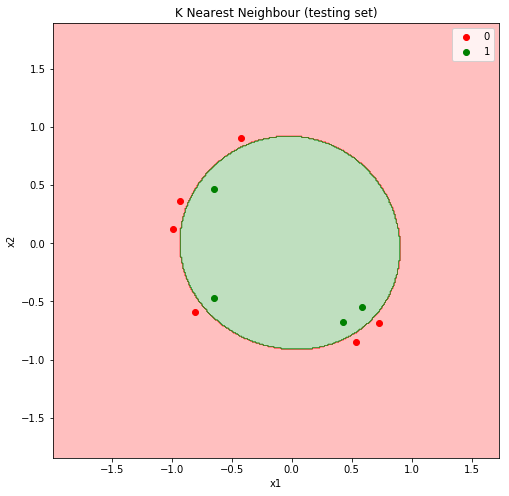

In [40]:
# Visualising the Training set results
plt.figure(figsize =(8,8))
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_svm_kernal.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               color = ['red', 'green'][i], label = j)

#plt.scatter(X_set[:,0],X_set[:,1] ,color = 'blue')
    
plt.title('K Nearest Neighbour (testing set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()